In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from wordcloud import WordCloud

%matplotlib inline

### Analisis Exploratorio de Datos

In [4]:
# Leemos el daframe
data = pd.read_csv('Dataset/df.csv', dtype={'popularity': str}) 
data.head(5)

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,collection_name,genre_names,release_year,return,production_countries_names,production_companies_names
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,Toy Story Collection,Animation|Comedy|Family,1995.0,12.45,United States of America,Pixar Animation Studios
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,NaN,Adventure|Fantasy|Family,1995.0,4.04,United States of America,"TriStar Pictures, Teitler Film, Interscope Com..."
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,Grumpy Old Men Collection,Romance|Comedy,1995.0,0.00,United States of America,"Warner Bros., Lancaster Gate"
3,3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,NaN,Comedy|Drama|Romance,1995.0,5.09,United States of America,Twentieth Century Fox Film Corporation
4,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,Father of the Bride Collection,Comedy,1995.0,0.00,United States of America,"Sandollar Productions, Touchstone Pictures"


In [5]:
# Cantidad de filas x columna en el datagframe
data.shape

(45379, 20)

In [6]:
# Miramos los tipos de datos que tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  45379 non-null  int64  
 1   budget                      45376 non-null  float64
 2   id                          45379 non-null  object 
 3   original_language           45368 non-null  object 
 4   overview                    44438 non-null  object 
 5   popularity                  45377 non-null  object 
 6   release_date                45376 non-null  object 
 7   revenue                     45379 non-null  float64
 8   runtime                     45130 non-null  float64
 9   spoken_languages            41488 non-null  object 
 10  status                      45296 non-null  object 
 11  tagline                     20398 non-null  object 
 12  title                       45376 non-null  object 
 13  vote_average                453

In [7]:
# Miramos si hay valores duplicados
duplicados = data.duplicated()
print("Número de filas duplicadas:", duplicados.sum())


Número de filas duplicadas: 0


### Esta grafica nos muestra la nube de palabras con las palabras más frecuentes en los títulos de las películas.

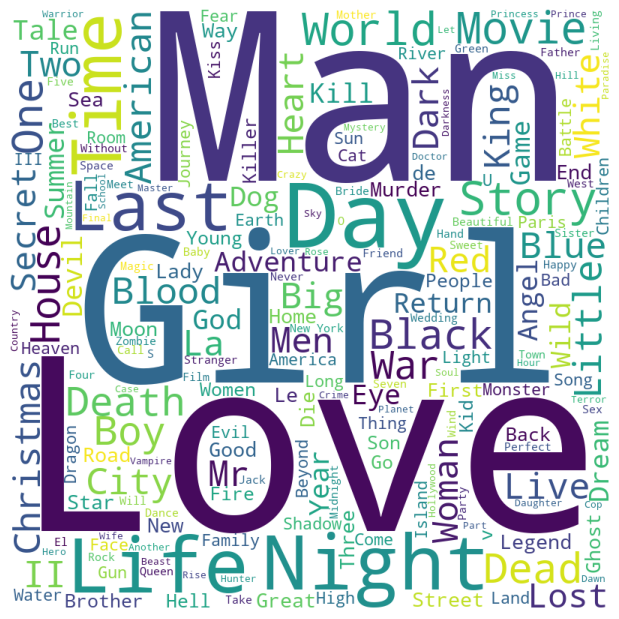

In [8]:
from wordcloud import WordCloud

# Convertimos la columna "title", en una lista de strings, utilizamos el método, ".astype(str)", para convertir la columna a tipo string, 
# asegurándose de que todos los valores sean strings, luego utilizamos el método, ".tolist()", para convertir la columna en una lista. 

titulos = data["title"].astype(str).tolist()
text = " ".join(title for title in titulos)

# Utilizamos la clase wordcloud para crear una visualización de texto en forma de nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='White', min_font_size=10).generate(text)

# Graficamos

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Cantidad historica de peliculas por año, nos damos cuenta que en la epoca de la pandemia (Covid-19), se cayeron los estrenos de las peliculas a 0. Lo que que quiere decir que si hubieron outliers que fueron causados por la pandemia que inicio el 11 de marzo de 2020

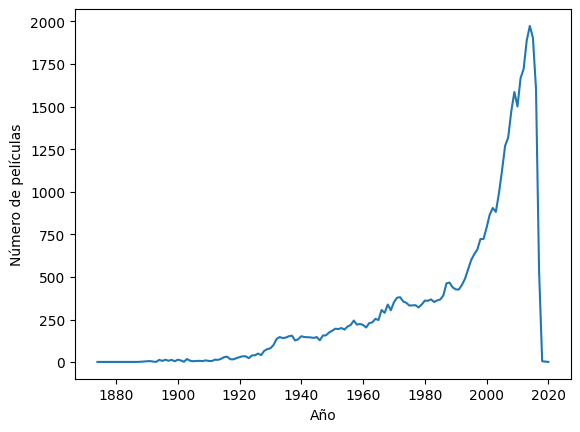

In [9]:
peliculas_anio = data['release_year'].value_counts().sort_index()

plt.plot(peliculas_anio.index, peliculas_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()


### La última fecha de lanzamiento de una película fue: 16/12/2020

In [10]:
from termcolor import colored

data['release_date'] = pd.to_datetime(data['release_date'])
data.sort_values('release_date', ascending=False, inplace=True)

ultima_fecha_estreno = data.iloc[0]['release_date']
print(colored(f'La última fecha de lanzamiento de una película fue: {ultima_fecha_estreno.day}/{ultima_fecha_estreno.month}/{ultima_fecha_estreno.year}', 'green', attrs=['bold']))

La última fecha de lanzamiento de una película fue: 16/12/2020


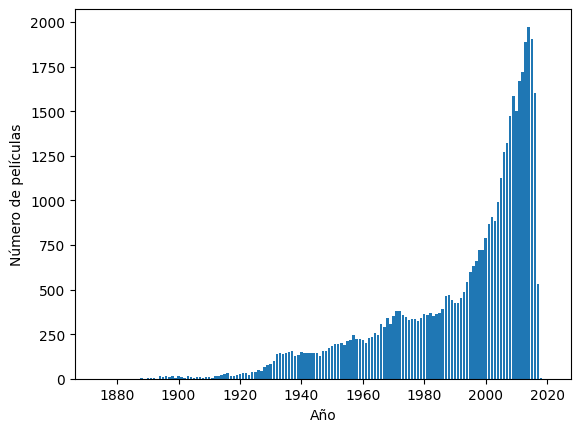

In [11]:
# Grafica de barras

plt.bar(peliculas_anio.index, peliculas_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()


### La grafica nos muestra que el pico máximo de estrenos de películas fue en el año: 2014

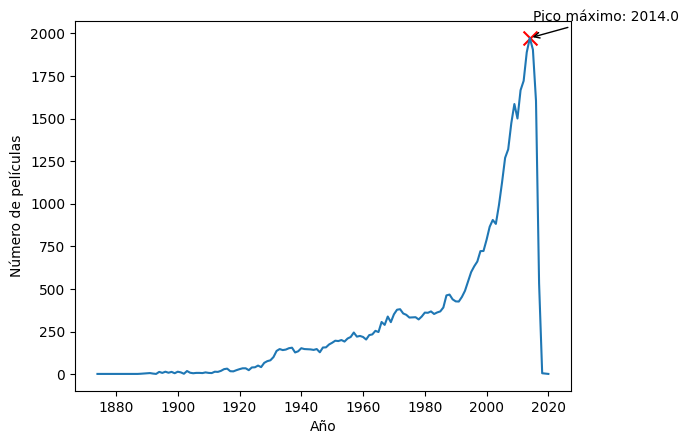

In [12]:
# Obtener los datos de las películas por año
peliculas_anio = data['release_year'].value_counts().sort_index()

# Graficar el número de películas por año
plt.plot(peliculas_anio.index, peliculas_anio.values)
plt.xlabel('Año')
plt.ylabel('Número de películas')

# Encontrar el pico máximo
indice_pico_maximo = np.argmax(peliculas_anio.values)
anio_pico_maximo = peliculas_anio.index[indice_pico_maximo]
pico_maximo = peliculas_anio.values[indice_pico_maximo]

# Marcar el pico máximo en el gráfico
plt.scatter(anio_pico_maximo, pico_maximo, c='red', marker='x', s=100)

# Agregar etiqueta con el año del pico máximo
plt.annotate(f"Pico máximo: {anio_pico_maximo}", xy=(anio_pico_maximo, pico_maximo),
             xytext=(anio_pico_maximo + 1, pico_maximo + 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [13]:
# Ordenar el DataFrame por la columna "revenue" en orden descendente
peliculas_taquilleras = data.sort_values('revenue', ascending=False)

# Seleccionar las columnas relevantes
peliculas_taquilleras = peliculas_taquilleras[['title', 'revenue', 'return']]

# Mostrar las 10 películas más taquilleras con su retorno de inversión
peliculas_mas_taquilleras = peliculas_taquilleras.head(10)

# Imprimir el resultado
print(peliculas_mas_taquilleras)


                                              title       revenue  return
14545                                        Avatar  2.787965e+09   11.76
26526                  Star Wars: The Force Awakens  2.068224e+09    8.44
1637                                        Titanic  1.845034e+09    9.23
17807                                  The Avengers  1.519558e+09    6.91
25055                                Jurassic World  1.513529e+09   10.09
28800                                     Furious 7  1.506249e+09    7.93
26529                       Avengers: Age of Ultron  1.405404e+09    5.02
17426  Harry Potter and the Deathly Hallows: Part 2  1.342000e+09   10.74
22085                                        Frozen  1.274219e+09    8.49
42154                          Beauty and the Beast  1.262886e+09    7.89


### Se observa en el grafico las 10 peliculas mas taquilleras del cine, la primera "Avatar", con un valor de $2,787.965 millones de dólares

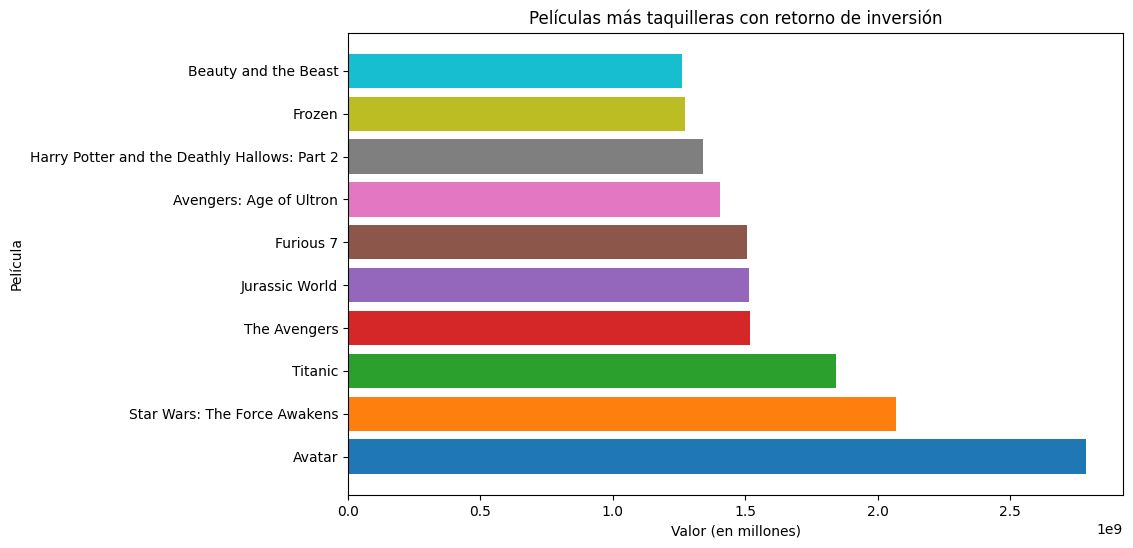

In [14]:
# Gráficamos
titulos = peliculas_mas_taquilleras['title']
ingresos = peliculas_mas_taquilleras['revenue']
retorno = peliculas_mas_taquilleras['return']

# Colores para cada barra
colores = plt.cm.get_cmap('tab10')

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.barh(titulos, ingresos, color=colores(np.arange(len(titulos))), label='Ingresos')
plt.xlabel('Valor (en millones)')
plt.ylabel('Película')
plt.title('Películas más taquilleras con retorno de inversión')

# Mostrar el gráfico
plt.show()

### Revisando las peliculas mas taquilleras, nos damos cuenta que son en su mayoria de genero Ciencia Ficcion, este es un buen dato para posibles inversores 

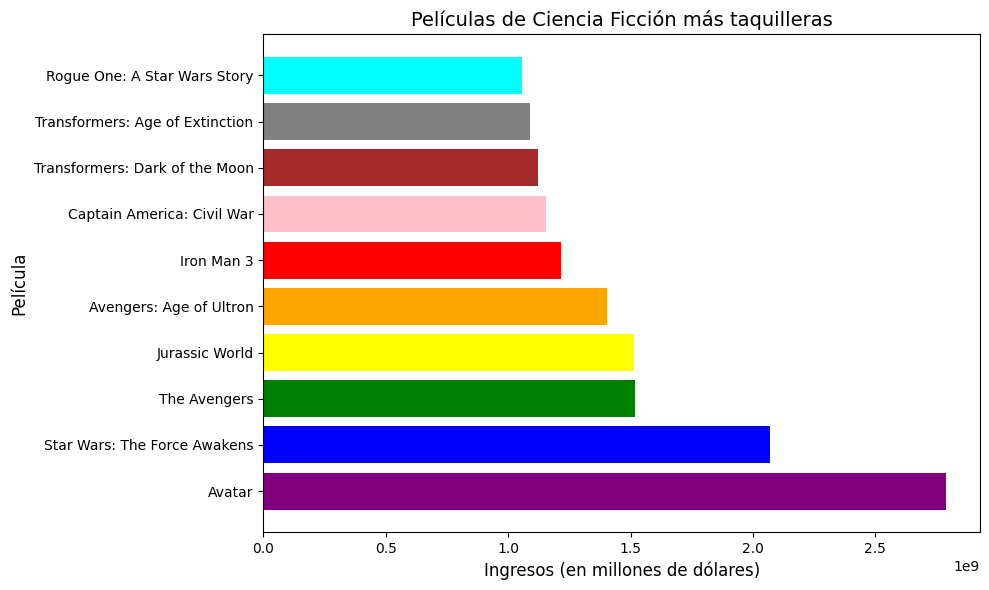

In [15]:
# Filtrar películas de ciencia ficción
peliculas_cf = data[data['genre_names'].str.contains('Science Fiction', na=False)]

# Ordenar películas por ingresos descendente
peliculas_cf = peliculas_cf.sort_values('revenue', ascending=False)

# Tomar las primeras 10 películas más taquilleras
peliculas_cf_top10 = peliculas_cf.head(10)

# Configurar el gráfico
plt.figure(figsize=(10, 6))
colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'pink', 'brown', 'gray', 'cyan']
plt.barh(peliculas_cf_top10['title'], peliculas_cf_top10['revenue'], color=colors)
plt.xlabel('Ingresos (en millones de dólares)', fontsize=12)
plt.ylabel('Película', fontsize=12)
plt.title('Películas de Ciencia Ficción más taquilleras', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Este mapa de calor nos muestra las relaciones que existen de todas las variables del conjunto de datos

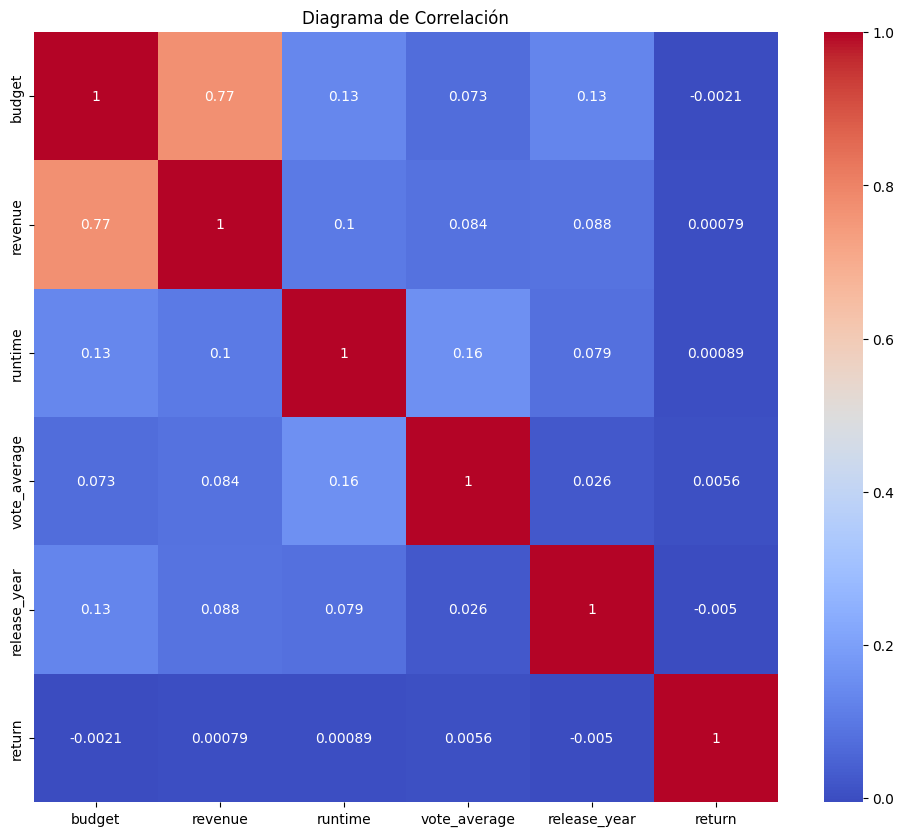

In [16]:
# Seleccionamos todas las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')
columnas_numericas = columnas_numericas.drop('Unnamed: 0', axis=1)

# Calculamos la matriz de correlación
correlacion = columnas_numericas.corr()

# Configuramos el gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

# Título del gráfico
plt.title('Diagrama de Correlación')

# Mostrar el gráfico
plt.show()
